# chi_square.ipynb
# WESmith 12/05/22
## experiment with creating chi-square random variables

In [3]:
from scipy.stats import chi2
import matplotlib.pyplot as plt
import numpy as np

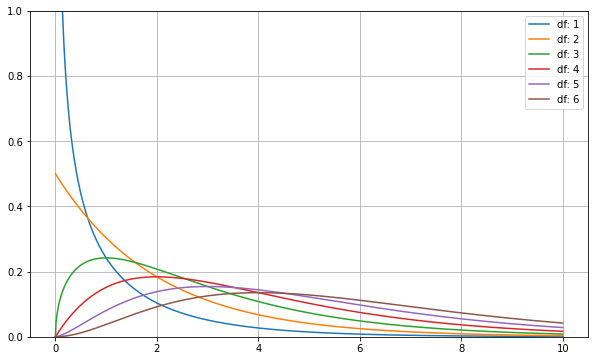

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
x = np.linspace(0,10, 1000)
for df in [1, 2, 3, 4, 5, 6]:
    ax.plot(x, chi2.pdf(x, df), label='df: {}'.format(df))
ax.set_ylim(0.0, 1.0)
ax.grid()
ax.legend()
plt.show()

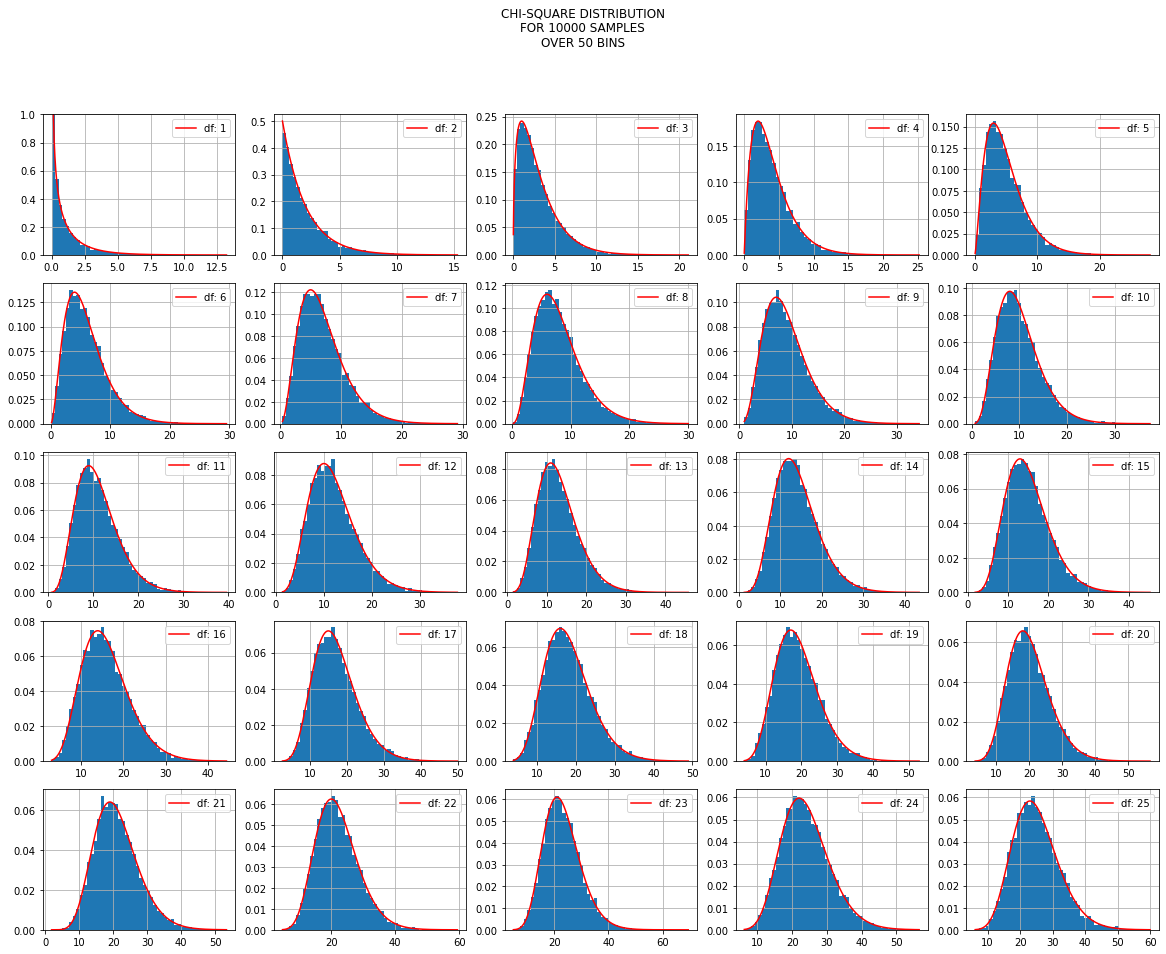

In [156]:
num = 10000
bins = 50
nw = 20 # figure width
nh = 15 # figure height
nr = 5
nc = 5
rows = list(range(nr))
cols = list(range(nc))
vals = [(r, c) for r in rows for c in cols]
nn   = np.array(range(len(rows)*len(cols))) + 1
fig, ax = plt.subplots(len(rows), len(cols), figsize=(nw, nh))
for (r,c), n in zip(vals, nn):
    out = []
    for j in range(num):
        dd = np.random.normal(loc=0, scale=1.0, size=n)
        out.append(np.sum(dd*dd)) # form sum of squares of n normal RVs
    out = np.array(out)
    ax[r, c].hist(out, bins=bins, density=True)
    x = np.linspace(out.min(), out.max(), 1000)
    ax[r, c].plot(x, chi2.pdf(x, n), 'r', label='df: {}'.format(n))
    if n == 1: ax[r, c].set_ylim(0.0, 1.0)
    ax[r, c].legend()
    ax[r, c].grid()
fig.suptitle('CHI-SQUARE DISTRIBUTION\nFOR {} SAMPLES\nOVER {} BINS'.format(num, bins))
plt.show()